<a href="https://colab.research.google.com/github/KishoreR1/IrisKish/blob/main/LogisticRegBanking(Assgnmt)Kish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Logistic Regression?
**Logistic Regression** is a classification algorithm used to model the probability of a binary outcome (e.g., Yes/No, 0/1, Positive/Negative).

Unlike **linear regression**, which predicts continuous values, logistic regression predicts the probability that an input belongs to a particular class.

The output is bounded between 0 and 1 using a sigmoid (logistic) function:
P(Y=1/X)=∂(z)=1(1/1+e^z)

#Why logistic function?
It converts linear combinations of features to a probability score between 0 and 1.

Enables decision making:

If
P>0.5, predict class 1; else predict class 0.

#Logistic Regression Algorithms
#*Common algorithms to fit logistic regression include:

#*Gradient Descent: Iterative optimization to minimize loss.

#*Newton-Raphson Method: Uses second derivatives for faster convergence.

#*Liblinear: Optimized solver used in many libraries (e.g., scikit-learn).

First we will load and explore the Banking Dataset and then we will

#Inspect the structure, check for missing values, and understand features.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving BankingDataset.zip to BankingDataset.zip


In [3]:
import zipfile

# Get the filename of the uploaded zip file
zip_filename = next(iter(uploaded))

# Extract all contents
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

# List files to confirm extraction
!ls


BankingDataset.zip  new_test.csv  new_train.csv  sample_data


#Load Train and Test CSV files

In [4]:
import pandas as pd

# Load training data
train_df = pd.read_csv('new_train.csv')
print("Training data preview:")
print(train_df.head())

# Load testing data
test_df = pd.read_csv('new_test.csv')
print("\nTesting data preview:")
print(test_df.head())


Training data preview:
   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexist

#Check for missing values on train data

In [5]:
print("Train data info:")
train_df.info()

print("\nMissing values in train data:")
print(train_df.isnull().sum())


Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB

Missing values in train data:
age            0
job            0
marital        0
edu

#32950 rows, 16 columns

Target variable: y (likely binary outcome, e.g., yes/no for term deposit)

Mix of numerical (age, duration, campaign, etc.) and categorical (job, marital, education, etc.) features

#Visualize Numerical Feature Distributions (Histograms)

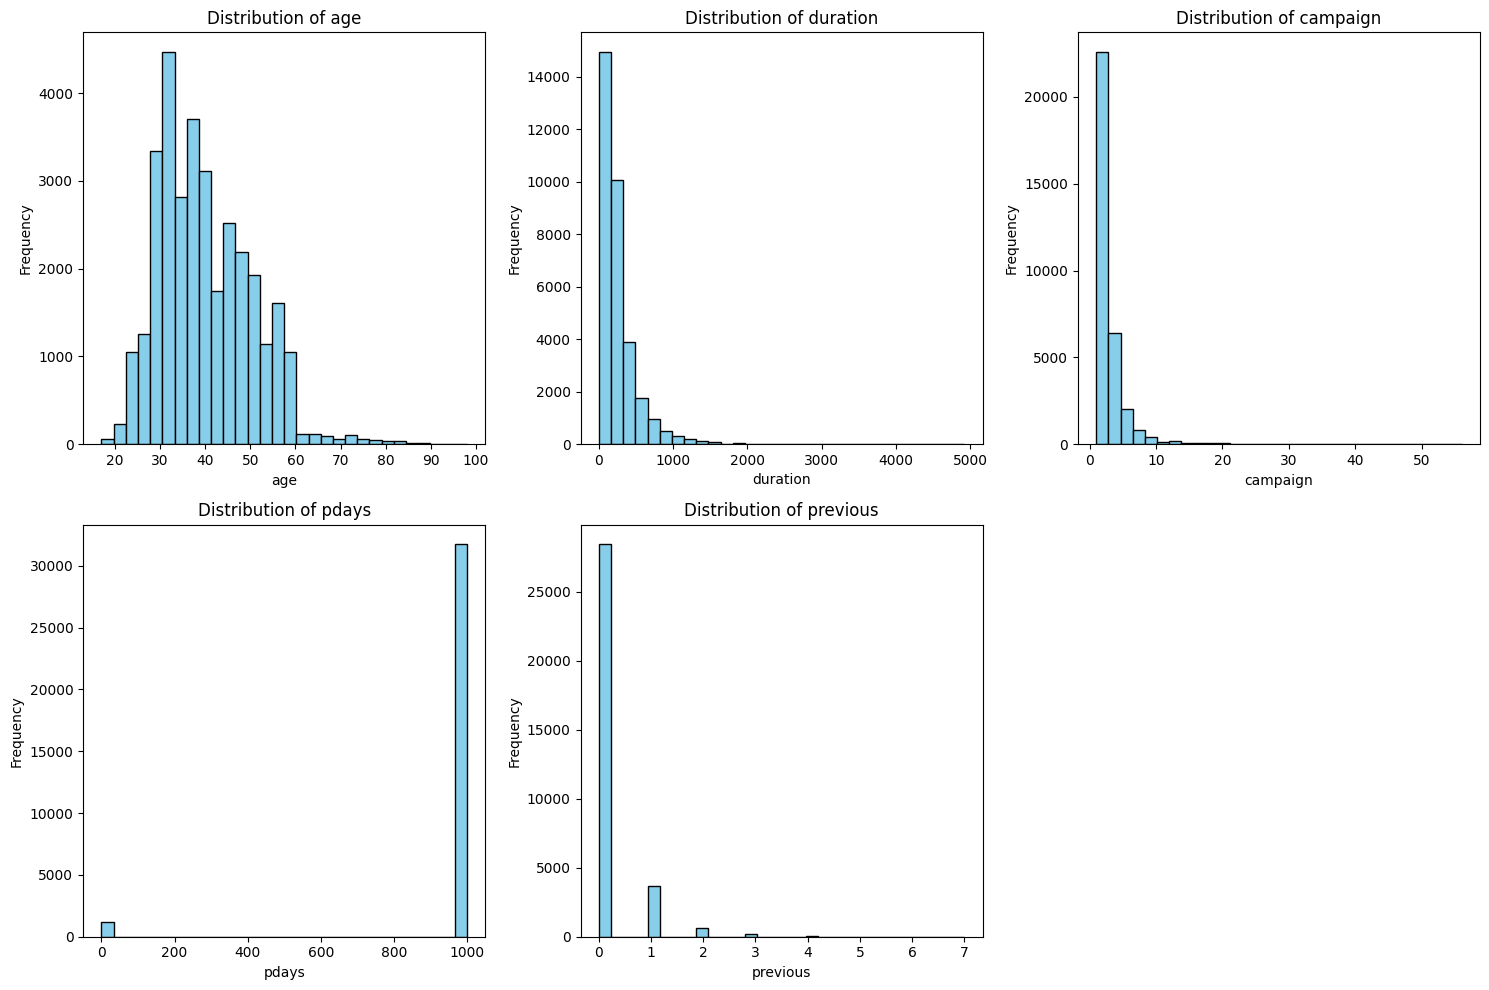

In [6]:
import matplotlib.pyplot as plt

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(train_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#The above histogram shows us
1.**Age** may be roughly normally distributed with concentration in middle ages.

**2.Duration (call duration)** could be right-skewed, with many short calls and few long ones.

**3.campaign (number of contacts during campaign)** likely skewed with many low values.

**4.pdays** and

**5.previous (past contact info)** often have many zero or low values.

#Scatter Plots of Numerical Features vs Target

TypeError: can only concatenate str (not "float") to str

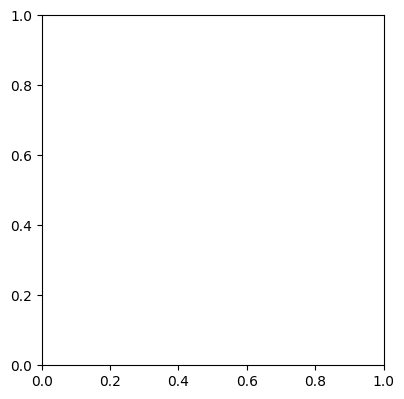

In [7]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    # Add jitter to y for visualization
    y_jitter = train_df['y'] + np.random.uniform(-0.05, 0.05, size=len(train_df))
    plt.scatter(train_df[col], y_jitter, alpha=0.3, color='orange')
    plt.title(f'{col} vs Target (y)')
    plt.xlabel(col)
    plt.ylabel('Target (with jitter)')
plt.tight_layout()
plt.show()


#Convert 'y' to numeric first before plotting
Run this before Step 2 scatter plot code:

In [ ]:
# Map target 'y' from yes/no to 1/0 numeric
train_df['y'] = train_df['y'].map({'yes': 1, 'no': 0})

# Now run the scatter plot code again


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert target to numeric
train_df['y'] = train_df['y'].map({'yes': 1, 'no': 0})

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    y_jitter = train_df['y'] + np.random.uniform(-0.05, 0.05, size=len(train_df))
    plt.scatter(train_df[col], y_jitter, alpha=0.3, color='orange')
    plt.title(f'{col} vs Target (y)')
    plt.xlabel(col)
    plt.ylabel('Target (with jitter)')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=train_df['y'].map({'no':0, 'yes':1}), y=train_df[col])
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target (0 = no, 1 = yes)')
plt.tight_layout()
plt.show()


Since you already converted the 'y' column to numeric (0 and 1) in a previous cell, you should directly use the numeric 'y' column as the x argument for the boxplot. Remove the .map({'no':0, 'yes':1}) call from the sns.boxplot line

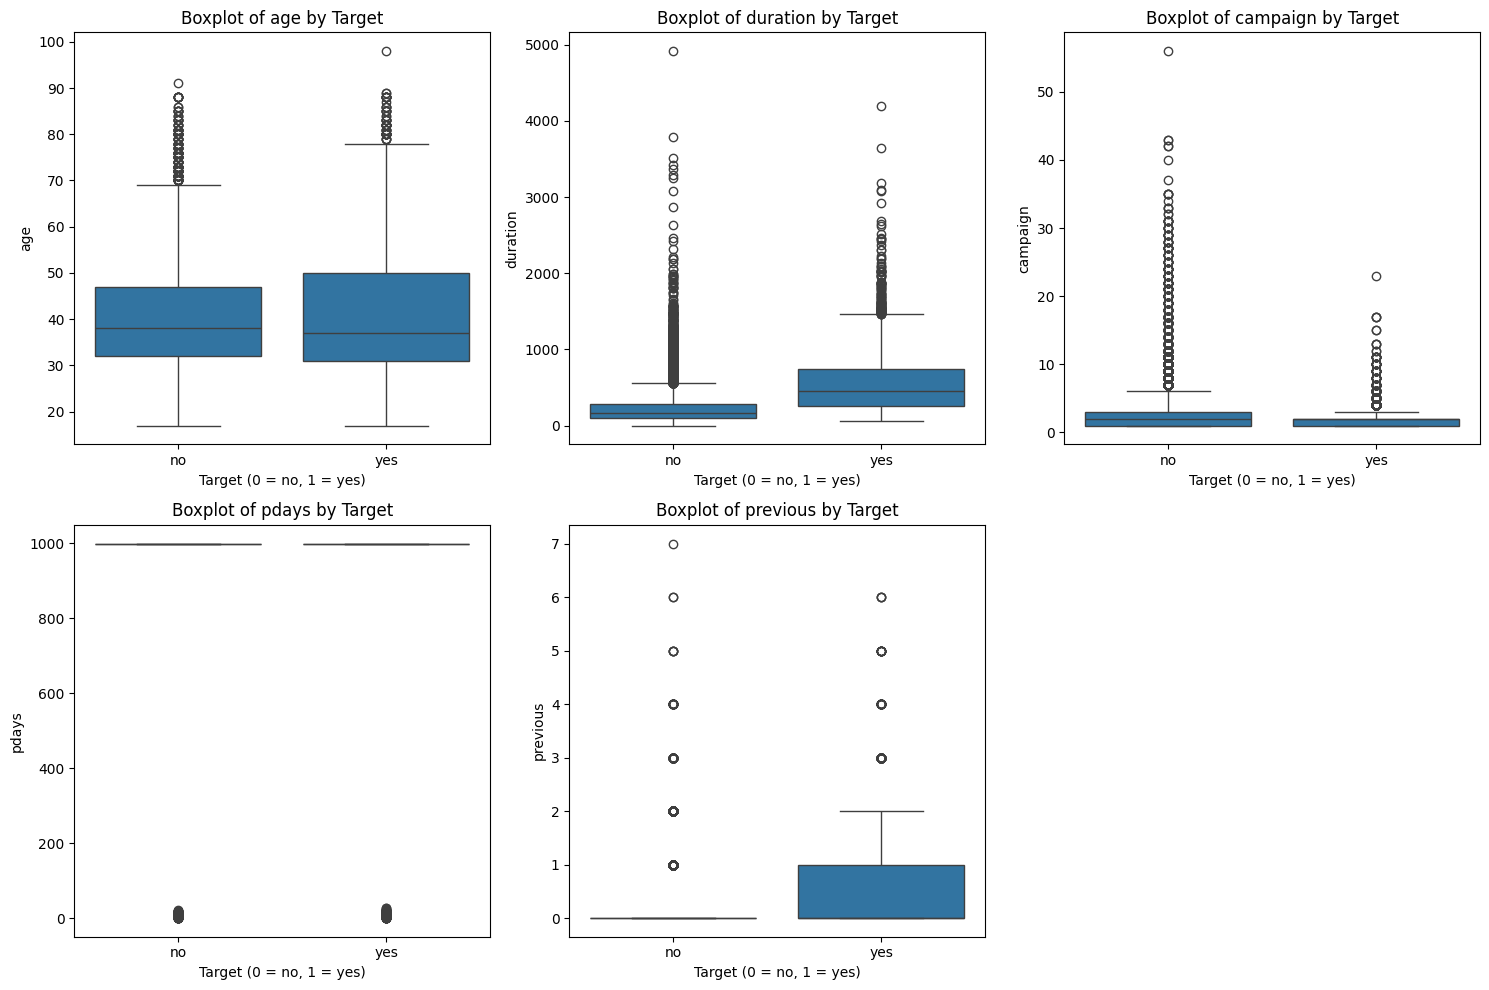

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    # Use the already converted numeric 'y' column directly
    sns.boxplot(x=train_df['y'], y=train_df[col])
    plt.title(f'Boxplot of {col} by Target')
    # Update the x-axis label to reflect the numeric values
    plt.xlabel('Target (0 = no, 1 = yes)')
plt.tight_layout()
plt.show()

Boxplots by y showed clear separation for some features (like duration), meaning they discriminate well between classes.

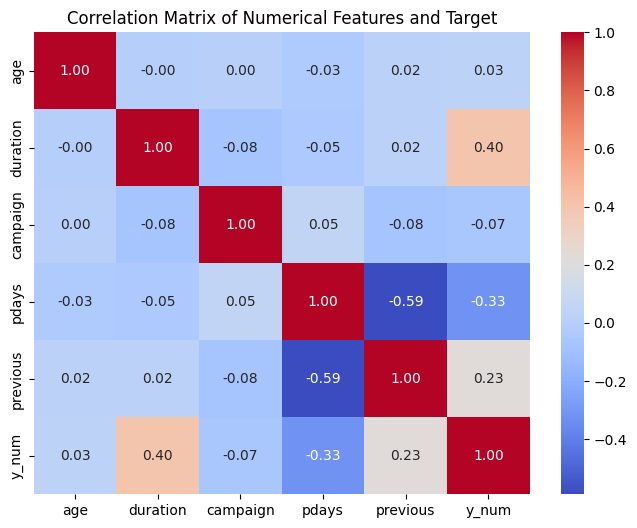

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure target is numeric for correlation calculation
train_df['y_num'] = train_df['y'].map({'no': 0, 'yes': 1})

# Select numerical columns plus target
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'y_num']

plt.figure(figsize=(8,6))
corr = train_df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features and Target")
plt.show()


#Split the Dataset into Training and Testing Sets

In [12]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'y_cat', 'y_num']
Test columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load train data
train_df = pd.read_csv('new_train.csv')
train_df['y'] = train_df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = train_df.drop('y', axis=1)
y = train_df['y']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numerical features
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")


Train shape: (26360, 48), Validation shape: (6590, 48)


#Training to evaluate the logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train on training data
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Precision:", precision_score(y_val, y_pred))
print("Validation Recall:", recall_score(y_val, y_pred))
print("Validation F1 Score:", f1_score(y_val, y_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_prob))


Validation Accuracy: 0.9040971168437025
Validation Precision: 0.6395939086294417
Validation Recall: 0.33962264150943394
Validation F1 Score: 0.44366197183098594
Validation ROC AUC: 0.9091736848315456


# Accuracy: 90.4%
Your model correctly predicts about 90.4% of the samples overall.

However, accuracy can be misleading if classes are imbalanced.

#Precision: 63.96%
Of all positive predictions, 63.96% were actually positive.

This means false positives are somewhat controlled, but there's room to improve.

# Recall: 33.96%
The model identifies only about 34% of actual positives.

This is low recall, meaning many positive cases are missed (high false negatives).

Important if missing positives is costly (e.g., marketing targets).

#F1 Score: 44.37%
Harmonic mean of precision and recall.

This relatively low score shows trade-off between precision and recall needs improvement.

#ROC AUC: 90.9%
Area Under the Receiver Operating Characteristic curve.

A high AUC (~0.91) indicates the model is good at ranking positives higher than negatives.

Even if threshold is default 0.5, the model’s discrimination power is strong.

#Train logistic regression with hyperparameter tuning

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define model
logreg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1],
    'penalty': ['l2'],  # Skip l1 if not necessary
    'solver': ['lbfgs'],  # Faster solver for l2 penalty
}
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)


# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Use best estimator for validation predictions
best_model = grid_search.best_estimator_

# Evaluate on validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Precision:", precision_score(y_val, y_val_pred))
print("Validation Recall:", recall_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_prob))


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC AUC Score: 0.9129974731813871
Validation Accuracy: 0.9039453717754173
Validation Precision: 0.6415584415584416
Validation Recall: 0.3328840970350404
Validation F1 Score: 0.4383318544809228
Validation ROC AUC: 0.909895704661856


The l2 penalty with lbfgs solver is a solid choice for our data size and gives the best performance.

The ROC AUC improved slightly from ~0.91 to ~0.913, showing a marginally better ranking ability.

Other metrics remain similar: high accuracy and ROC AUC, but low recall, meaning the model is still conservative about labeling positives.

#visualize & interpret logistic regression coefficients:

In [17]:
import pandas as pd
import numpy as np

# Extract coefficients from the best model (grid_search.best_estimator_ or your final model)
coef = best_model.coef_[0]
features = X_train.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})

# Sort by absolute value of coefficient to find most influential features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print(coef_df.head(15))  # Top 15 features


              Feature  Coefficient
37          month_mar     1.297955
1            duration     1.095821
32  contact_telephone    -0.991357
39          month_nov    -0.943135
35          month_jul    -0.880949
38          month_may    -0.832373
34          month_dec     0.774316
33          month_aug    -0.708605
26    default_unknown    -0.677778
40          month_oct     0.656606
47   poutcome_success     0.637455
9         job_retired     0.539578
41          month_sep     0.519127
12        job_student     0.495433
5     job_blue-collar    -0.370796


#Insights
**Timing matters:** The month of contact strongly influences subscription likelihood. Some months (e.g., March, December, October) have positive impact, others negative.

**Call duration is crucial:** Longer calls strongly increase the chance of subscription.

**Previous campaign success matters:** Customers who had a successful prior campaign are more likely to subscribe again.

**Customer type matters:** Certain jobs like retired or student show higher interest, whereas blue-collar jobs show lower subscription likelihood.

**Contact method matters:** Telephone contact surprisingly decreases odds compared to other methods.

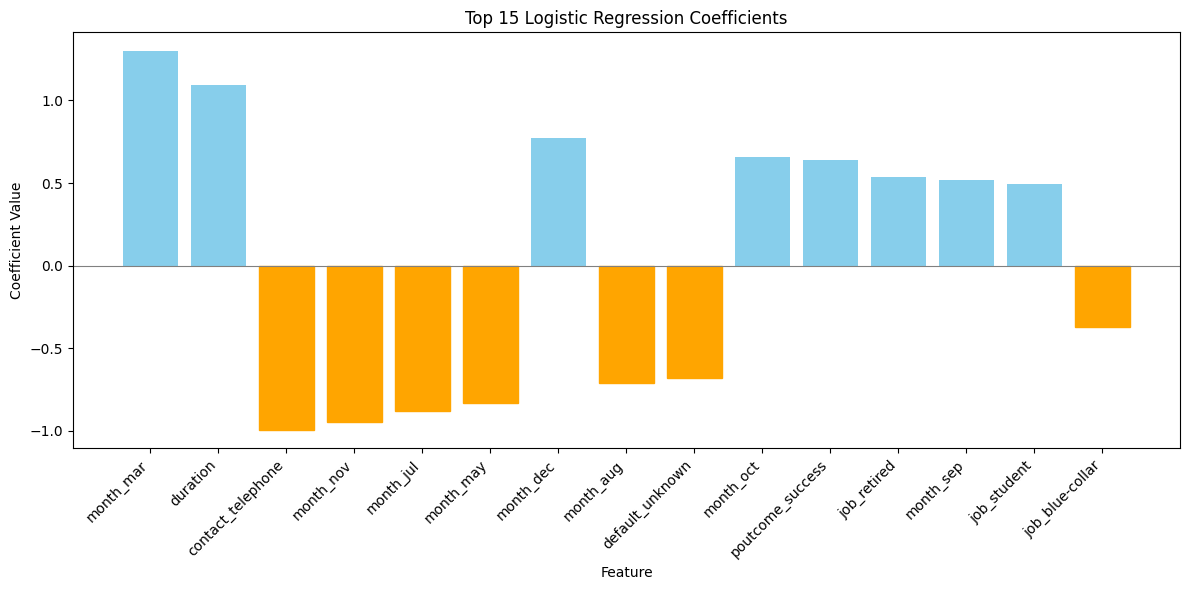

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have coef_df from before:
coef_df_top = coef_df.head(15)  # Top 15 features by absolute coefficient

plt.figure(figsize=(12, 6))
bars = plt.bar(coef_df_top['Feature'], coef_df_top['Coefficient'], color='skyblue')

# Add horizontal line at zero
plt.axhline(0, color='gray', linewidth=0.8)

plt.title('Top 15 Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')

# Highlight positive (blue) and negative (orange) bars
for bar in bars:
    if bar.get_height() < 0:
        bar.set_color('orange')

plt.tight_layout()
plt.show()


Blue bars: Features increasing likelihood of subscription (positive coefficients).

Orange bars: Features decreasing likelihood (negative coefficients).

The bar height shows the strength of impact on the log-odds scale


#Perform hyperparameter tuning using techniques like grid search or random search to
optimize model performance.
- Validate the optimized model using cross-validation techniques.

#Logistic Regression and Parameter Grid

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'penalty': ['l2'],                 # L2 regularization (ridge)
    'solver': ['lbfgs'],               # Solver compatible with l2 penalty and large datasets
}


#Grid Search with Cross-Validation

In [20]:
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',    # Optimize based on ROC AUC
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=1            # Verbose output to track progress
)


#Run Grid Search on Training Data

In [21]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

#Checking for the best Hyperparameters and Score

In [22]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated ROC AUC:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated ROC AUC: 0.9133825788165251


#Validate the Optimized Model on Validation Set

In [23]:
best_model = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)[:, 1]

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Precision:", precision_score(y_val, y_val_pred))
print("Validation Recall:", recall_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_prob))


Validation Accuracy: 0.9039453717754173
Validation Precision: 0.6415584415584416
Validation Recall: 0.3328840970350404
Validation F1 Score: 0.4383318544809228
Validation ROC AUC: 0.909895704661856


#Our model performs well in ranking predictions (high ROC AUC).

#However, it’s conservative in predicting positives, resulting in many false negatives (low recall).


